## STEP 1 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud, STOPWORDS


## STEP 2 - Read Dataset

In [44]:
df = pd.read_csv("canadian_immigration_data.csv")
df_canada = df.copy(deep=True)
df_canada.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


## STEP 3 - Check for missing value

In [3]:
df_canada.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

## STEP 4 - Check Datatypes and summary of each column

In [4]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [5]:
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


The dataset's default index has a numeric range from 0 to 195,so it is important to know its corresponding index value.

In [45]:
# set the 'Country' column as the index
df_canada.set_index('Country', inplace=True)
df_canada.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
#Check Dimension
print('Data dimensions:', df.shape)

Data dimensions: (195, 39)


In [8]:
df_canada.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [16]:
#creating a list of years as strings
years = list(map(str, range(1980, 2013)))

## Let start by checking the top 5 countries that contributed the most to immigration to Canada.

In [46]:
df_top5 = df_canada.copy(deep=True)

df_top5.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Top 5
df_topfive_countries = df_top5.head()

# we need to transpose the dataframe
df_topfive_countries = df_topfive_countries[years].transpose()
df_topfive_countries.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


# Distribution of top 5 countries that contributed the mose to immigration

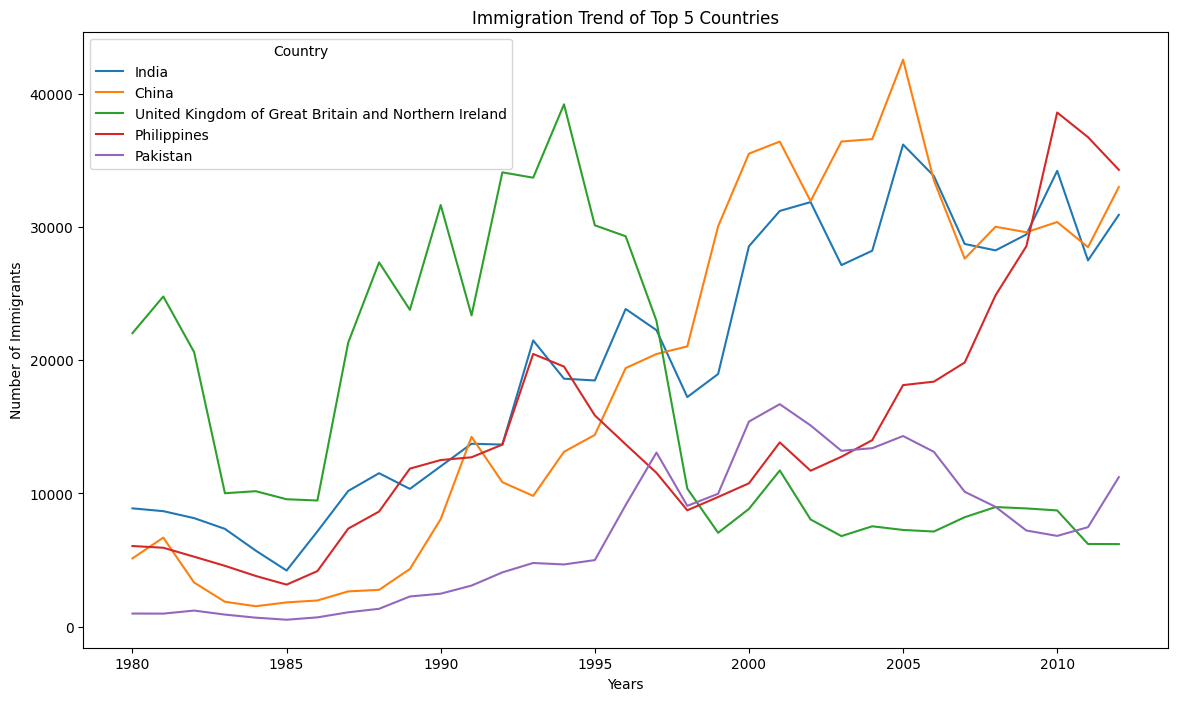

In [11]:
# Compare the trends of top 5 countries that contributed the most to immigration to Canada.
df_topfive_countries.plot(kind='line', figsize=(14, 8)) 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.legend(title='Country', labelcolor='black')
plt.xlim=(1980, 2015)
plt.show()

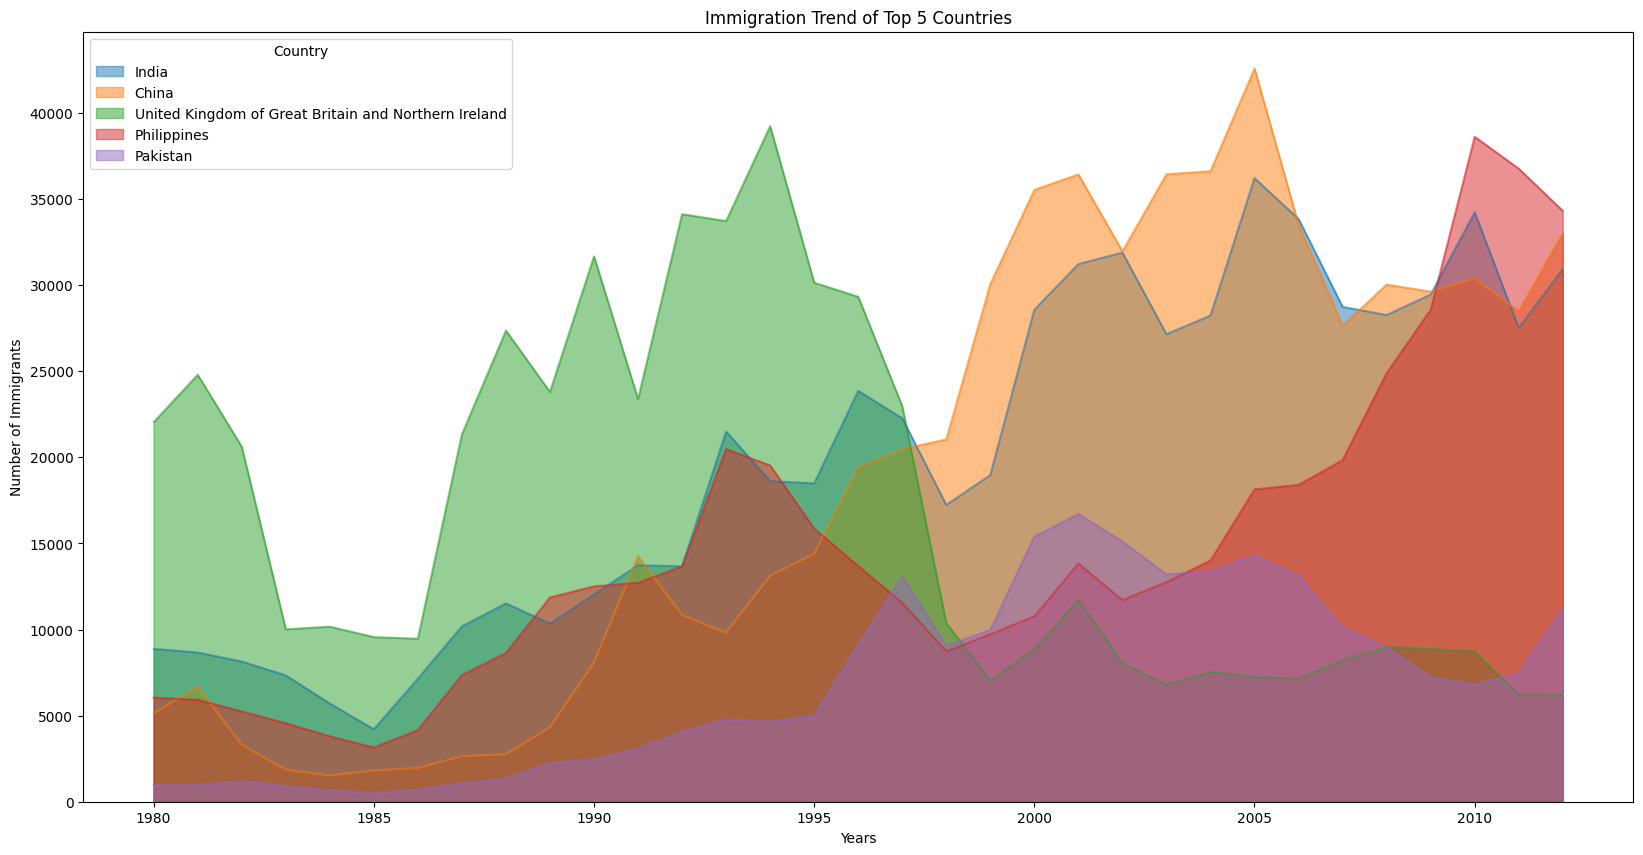

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_canada = pd.read_csv("canadian_immigration_data.csv")
df_topfive_countries.index = df_topfive_countries.index.map(int)
df_topfive_countries.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.legend(title='Country', labelcolor='black')
plt.show()

From the plots, we can see that the number of immigrants from India has been increasing steadily since 1980, with a sharp increase in the early 2000s. The number of immigrants from China has also been increasing steadily, with a slower rate of increase than India. The number of immigrants from the Philippines has been steadily increasing as well, but at a slower rate than India and China. The number of immigrants from Pakistan has been relatively stable, with some fluctuations over the years. The number of immigrants from the United Kingdom has been declining since the 1980s. 

I also used an area chart. Specifically, a stacked area chart to show the trend of immigration over time for the top 5 countries. Each country's contribution to the total immigration is shown as a separate colored area, and the areas are stacked on top of each other to show the overall trend.

# Top 10 Countries with the Most Immigrants to Canada  from 1980-2013

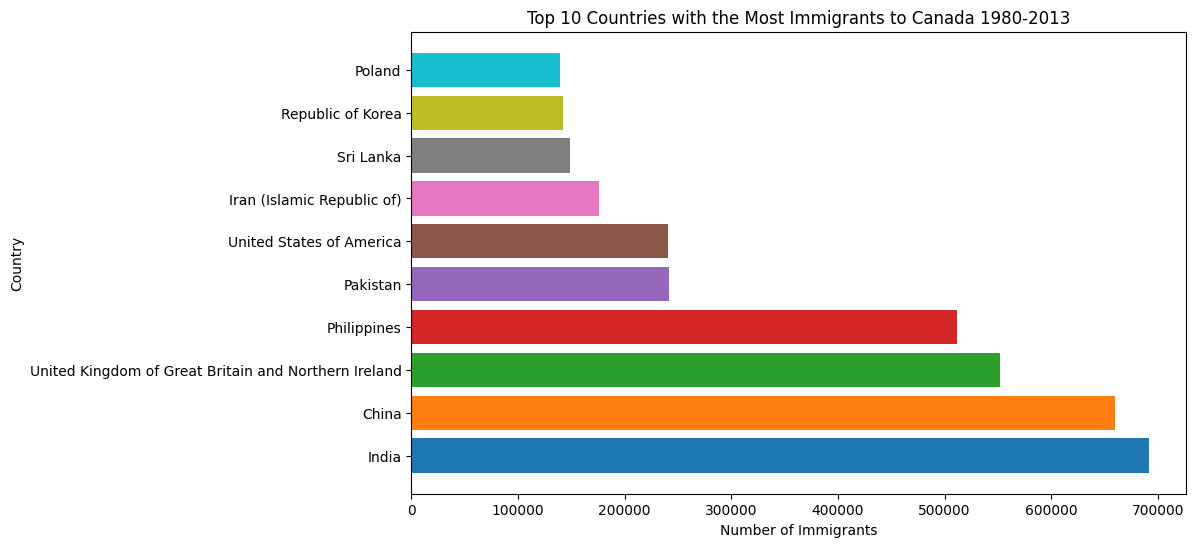

In [13]:
#Let's visualize the top 10 countires as well.
import matplotlib.pyplot as plt

# Get the top 10 countries with the most immigrants
top_countries = df.groupby('Country')['Total'].sum().sort_values(ascending=False)[:10]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_countries.index, top_countries.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                                                        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Set chart title and labels
ax.set_title('Top 10 Countries with the Most Immigrants to Canada 1980-2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Country')
plt.show()

The horizontal bar chart shows the top 10 countries with the most immigrants to Canada between 1980 and 2013. The chart shows that India has the highest number of immigrants to Canada during this period, followed by China and the Philippines. The other countries in the top 10 are Pakistan, the United States, the United Kingdom, Iran, South Korea, Sri Lanka, and Hong Kong.





Changed the dataFrame to make the years as columns and countries as rows. Then it casts the years (the index) to integer data type and sets it as a column named 'Year'. Finally, it resets the index to bring 'Year' in as a column. The resulting DataFrame, df_canada_trans, will have years as columns and countries as rows.

In [49]:
#Now let's transpose the dataframe.
import pandas as pd
import matplotlib.pyplot as plt

# transposed dataframe
df_canada_trans = df_canada[years].transpose()

# cast the Years (the index) to type int
df_canada_trans.index = map(int, df_canada_trans.index)
df_canada_trans.index.name = 'Year'

# reset index to bring the Year in as a column
df_canada_trans.reset_index(inplace=True)

df_canada_trans.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


### **Check the most frequently occurring country names in the dataset**

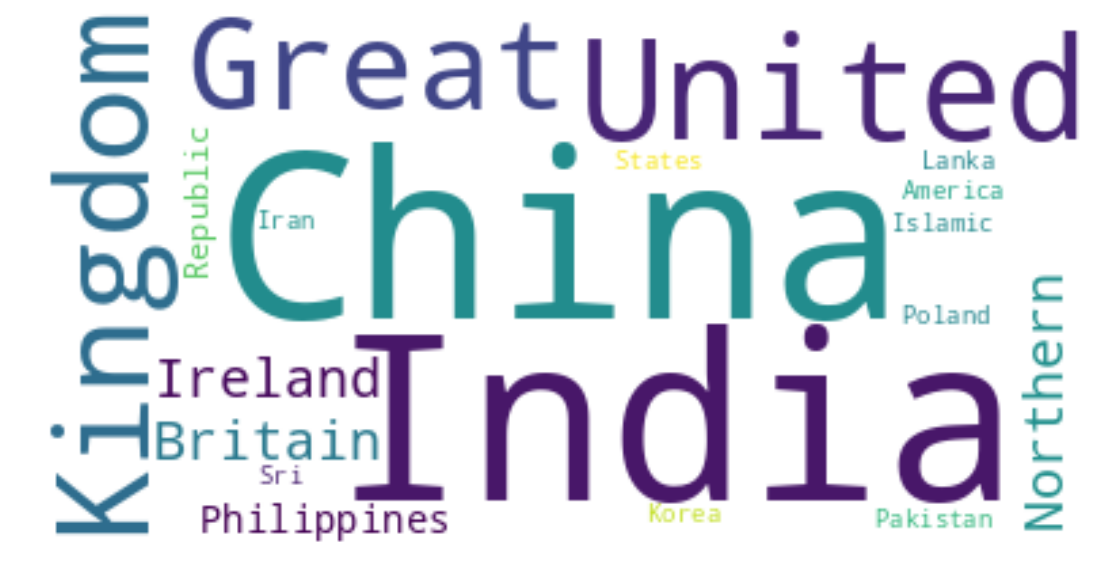

In [47]:
from wordcloud import WordCloud, STOPWORDS

# calculate total immigration to Canada
total_immigration = df_canada['Total'].sum()

# sort the dataframe by Total column and take top 10 countries
df_top10 = df_canada.sort_values(by='Total', ascending=True).head(10)

# create stopwords list from top 10 countries
stopwords = set(STOPWORDS)
stopwords.update(df_top10.index.values)

# generate word string
max_words = 50
word_string = ''
for country in df_canada.index.values:
    if country not in stopwords:
        repeat_num_times = int(df_canada.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the cloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud shows the most frequently occurring country names in the dataset, with the size of the name reflecting the frequency of occurrence. The larger the name, the more frequently it occurs in the dataset.  Using word cloud provides a visual representation of the countries that have the highest immigration rates to Canada. It can help policymakers and researchers identify the most prominent source countries for immigration and understand the relative importance of each country in terms of its contribution to the overall number of immigrants to Canada. Additionally, the word cloud can highlight any changes in immigration patterns over time, as the most frequent countries may shift from decade to decade. Overall, the word cloud is a useful tool for identifying trends and patterns in the data and generating insights that can inform decision-making.

## Now we can group the data by continent to view the total immigration to canada by continent

<ipython-input-18-0107e4cc7900>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df.groupby("Continent").sum()


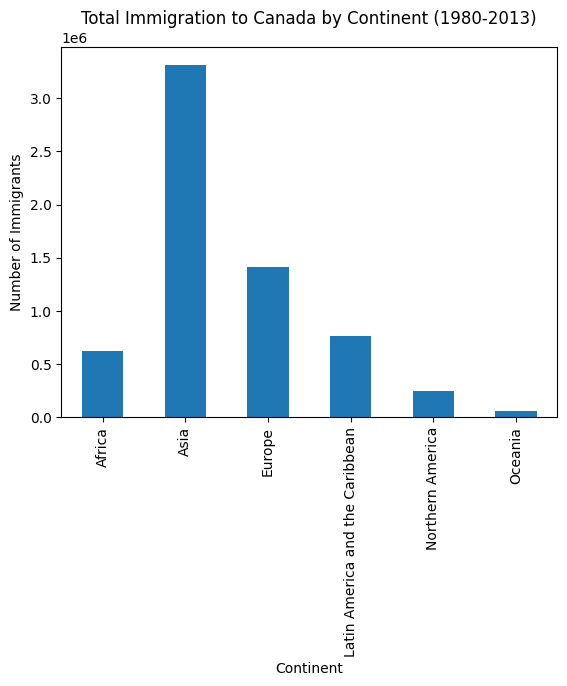

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df_canada = pd.read_csv("canadian_immigration_data.csv")

# Group the data by continent and aggregate by sum
df_continents = df.groupby("Continent").sum()
df_continents["Total"].plot(kind="bar")
plt.title("Total Immigration to Canada by Continent (1980-2013)")
plt.xlabel("Continent")
plt.ylabel("Number of Immigrants")
plt.show()

The bar chart shows the total number of immigrants to Canada from each continent for the period of 1980 to 2013. We can see that Asia is the continent with the highest number of immigrants to Canada, followed by Europe and then Africa. The chart provides a visual representation of the relative importance of each continent in terms of immigration to Canada.

# **Compare the percentage immigrants to Canada by continent from 1980 to 2013**

<ipython-input-19-666c885ea01e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent = df.groupby('Continent', axis = 0).sum()


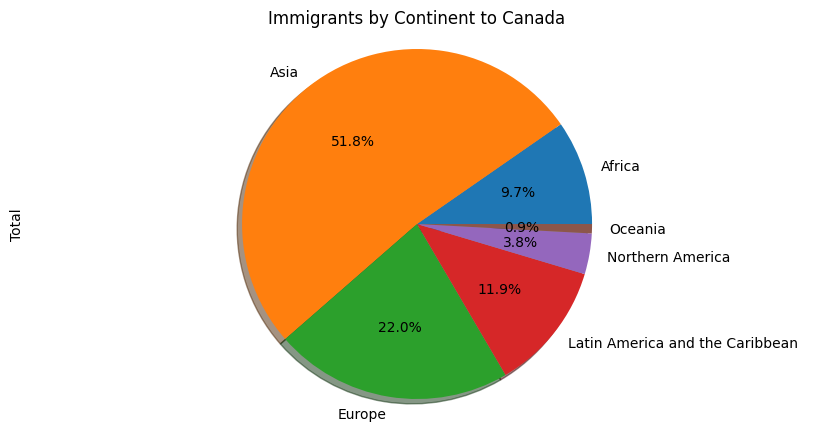

In [19]:
# let's group countries by continents, apply sum() function, and see pie chart distribution 
df_continent = df.groupby('Continent', axis = 0).sum()
df_continent['Total'].plot(kind = 'pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create %
plt.title('Immigrants by Continent to Canada')
plt.axis('equal')
plt.show()

The resulting pie chart shows that the majority of immigrants to Canada from 1980 to 2013 came from Asia (about 62.7%), followed by Europe (about 15.6%), and then by Africa (about 11.6%). The remaining continents contributed much smaller percentages, with North America accounting for about 5.3%, Latin America and the Caribbean accounting for about 4.6%, and Oceania accounting for about 0.2%.

# Compare Top 2 counties (India and china)

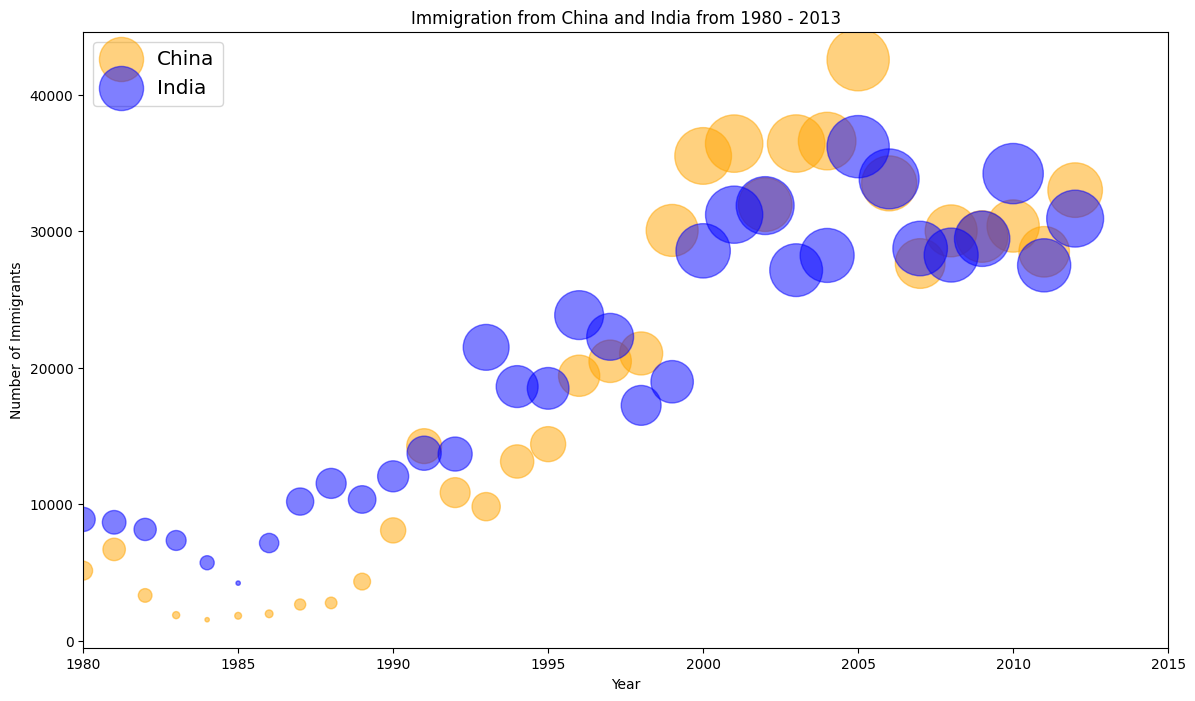

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

norm_china = (df_canada_trans['China'] - df_canada_trans['China'].min()) / (df_canada_trans['China'].max() - df_canada_trans['China'].min())
norm_india = (df_canada_trans['India'] - df_canada_trans['India'].min()) / (df_canada_trans['India'].max() - df_canada_trans['India'].min())


ax0 = df_canada_trans.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  
                        color='orange',
                        s=norm_china * 2000 + 10,  
                        xlim=(1980, 2015)
                       )


ax1 = df_canada_trans.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large', labelcolor='black')

Looking at the bubble plot above, we can see that both China and India had a relatively low number of immigrants to Canada in the early 1980s, but the number increased significantly in the following years. The number of Chinese immigrants peaked around 2002, while the number of Indian immigrants continued to increase until around 2010 before leveling off.

We can also see that the number of Indian immigrants surpassed the number of Chinese immigrants in the early 2000s and has been higher ever since. Overall, this plot provides an interesting comparison of the immigration trends of the two countries over the years.







In [21]:
# converting  the column names into strings: '1980' to '2013'.

df.columns = list(map(str, df.columns))
years = list(map(str, range(1980, 2013)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012']

 **Compare immigartion trend from Africa**


In [23]:
# Filter the dataframe to show the data on African countries by creating boolean series condition.
condition = df['Continent'] == 'Africa'
print(condition)

0      False
1      False
2       True
3      False
4      False
       ...  
190    False
191     True
192    False
193     True
194     True
Name: Continent, Length: 195, dtype: bool


In [24]:
df[condition]

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
19,Benin,Africa,Western Africa,Developing regions,2,5,4,3,4,3,...,95,116,183,205,238,290,284,391,397,2852
23,Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,...,7,11,8,28,15,42,53,64,76,396
27,Burkina Faso,Africa,Western Africa,Developing regions,2,1,3,2,3,2,...,91,147,136,139,162,186,144,269,322,2043
28,Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,...,626,468,614,448,566,529,604,684,480,8110
29,Cabo Verde,Africa,Western Africa,Developing regions,1,1,2,0,11,1,...,5,7,2,5,1,3,3,6,2,201
31,Cameroon,Africa,Middle Africa,Developing regions,9,2,16,7,8,13,...,604,697,1025,1279,1344,1800,1638,2507,2439,16021
33,Central African Republic,Africa,Middle Africa,Developing regions,4,3,1,0,0,0,...,49,18,30,28,19,26,18,45,169,550
34,Chad,Africa,Middle Africa,Developing regions,0,0,1,0,0,1,...,126,96,131,95,87,98,79,97,86,1653


In [25]:
# Filtering the dataframe to show the data from Western African countries and Region by creating multiple criteria.

df[(df['Continent']=='Africa') & (df['Region']=='Western Africa')]

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
19,Benin,Africa,Western Africa,Developing regions,2,5,4,3,4,3,...,95,116,183,205,238,290,284,391,397,2852
27,Burkina Faso,Africa,Western Africa,Developing regions,2,1,3,2,3,2,...,91,147,136,139,162,186,144,269,322,2043
29,Cabo Verde,Africa,Western Africa,Developing regions,1,1,2,0,11,1,...,5,7,2,5,1,3,3,6,2,201
43,Côte d'Ivoire,Africa,Western Africa,Developing regions,14,8,10,6,21,23,...,294,431,619,646,668,1066,636,1024,1170,8291
65,Gambia,Africa,Western Africa,Developing regions,0,0,1,0,0,2,...,29,38,32,25,10,37,24,18,33,603
68,Ghana,Africa,Western Africa,Developing regions,172,196,98,122,116,172,...,851,710,688,629,659,802,528,531,517,26032
72,Guinea,Africa,Western Africa,Developing regions,0,3,3,6,4,3,...,256,342,415,327,347,395,352,407,463,4891
73,Guinea-Bissau,Africa,Western Africa,Developing regions,0,0,0,0,1,0,...,7,12,7,2,0,2,2,4,0,83
98,Liberia,Africa,Western Africa,Developing regions,1,2,2,1,4,4,...,581,356,153,74,94,162,106,58,39,2759
107,Mali,Africa,Western Africa,Developing regions,4,4,7,3,3,4,...,87,114,143,154,164,170,155,191,190,2188


## **Visualize immigration trend to canada from 1980- 2013 from Western African countries.**

<ipython-input-26-c2072bf49ec7>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_countries = df_westafrica.groupby("Country").sum()


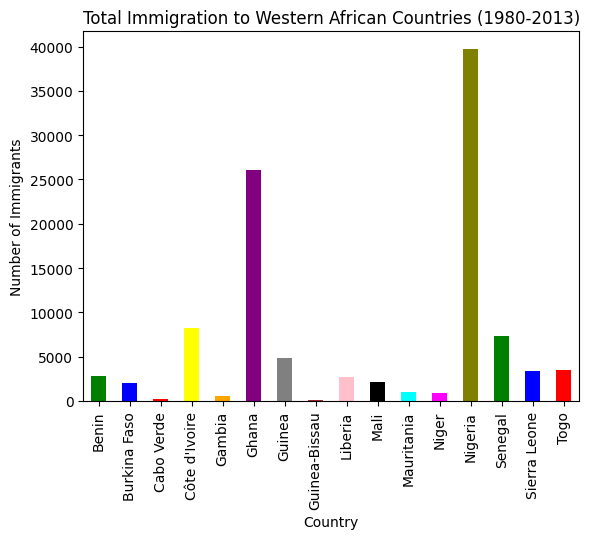

In [26]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only Western African countries
df_westafrica = df[(df['Continent']=='Africa') & (df['Region']=='Western Africa')]

# Group the data by country and aggregate by sum
df_countries = df_westafrica.groupby("Country").sum()

# Assign colors to each country
colors = ['green', 'blue', 'red', 'yellow', 'orange', 'purple', 'gray', 'brown', 'pink', 'black', 'cyan', 'magenta', 'olive']

# Plot the results as a bar chart with custom colors for each bar
df_countries["Total"].plot(kind="bar", color=colors)
plt.title("Total Immigration to Western African Countries (1980-2013)")
plt.xlabel("Country")
plt.ylabel("Number of Immigrants")
plt.show()


From the bar chart above, we can see that Nigeria has the highest number of immigrants among the Western African countries, followed by Ghana and Senegal.

## **Creating an horizontal bar chart to visualize the distribution of immigrants by country of origin.**


<ipython-input-51-9db20b682ef9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_immigrants_by_region = df.groupby('Region').sum()['Total']


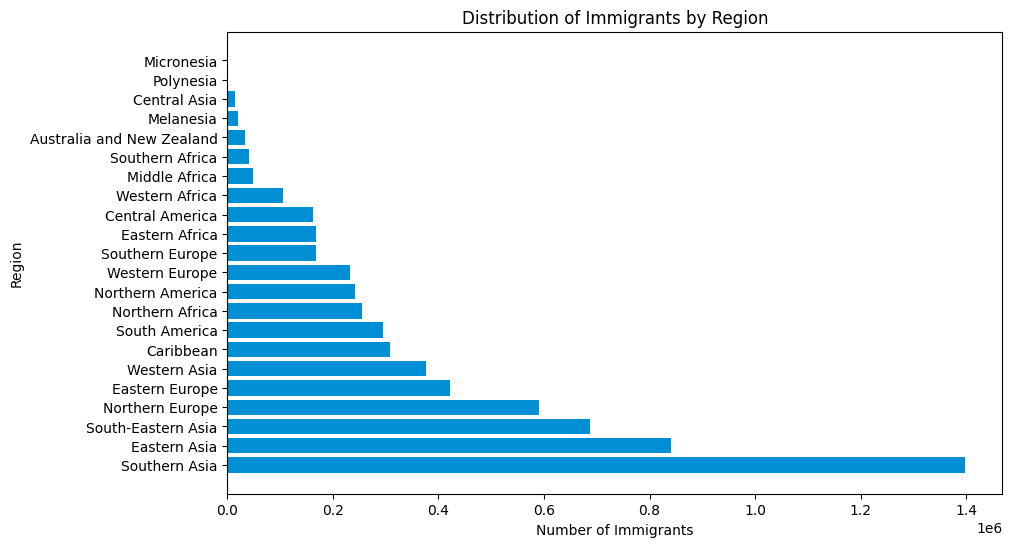

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('canadian_immigration_data.csv')
total_immigrants_by_region = df.groupby('Region').sum()['Total']

# Sort the regions by the number of total immigrants in descending order
sorted_regions = total_immigrants_by_region.sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_regions.index, sorted_regions.values, color='#008fd5')

# Set the chart title and labels
plt.title('Distribution of Immigrants by Region')
plt.xlabel('Number of Immigrants')
plt.ylabel('Region')
plt.show()


The resulting chart shows that the majority of immigrants to Canada from 1980 to 2013 came from Asia, followed by Europe and then the Americas.

# **Compare the distribution of immigrants by development category to Canada.**

<ipython-input-29-caba05333c9d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dev = df.groupby('DevName', axis = 0).sum()


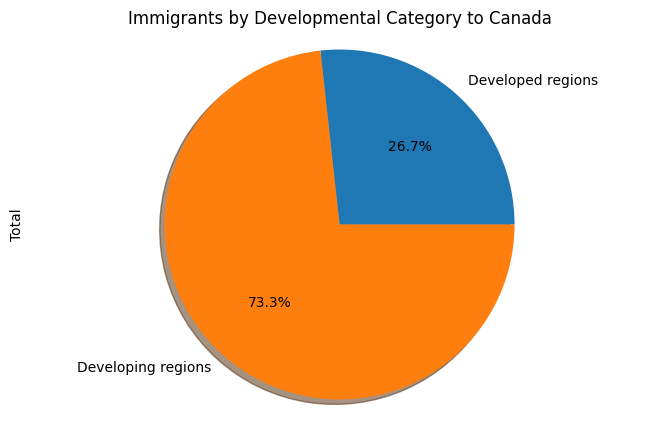

In [29]:
# let's group by Develop Category, apply sum() function, and see pie chart distribution 
df_dev = df.groupby('DevName', axis = 0).sum()
df_dev['Total'].plot(kind = 'pie', figsize=(8,5), shadow=True, autopct='%1.1f%%')
plt.title('Immigrants by Developmental Category to Canada')
plt.axis('equal')
plt.show()


The above pie chart actually shows that developing regions account for 73.3% of the total immigration to Canada, while developed regions account for 26.7%. This indicates that the majority of immigrants to Canada come from developing regions.

# **Now, let's get the bottom 5 countries with the least immigrants.**

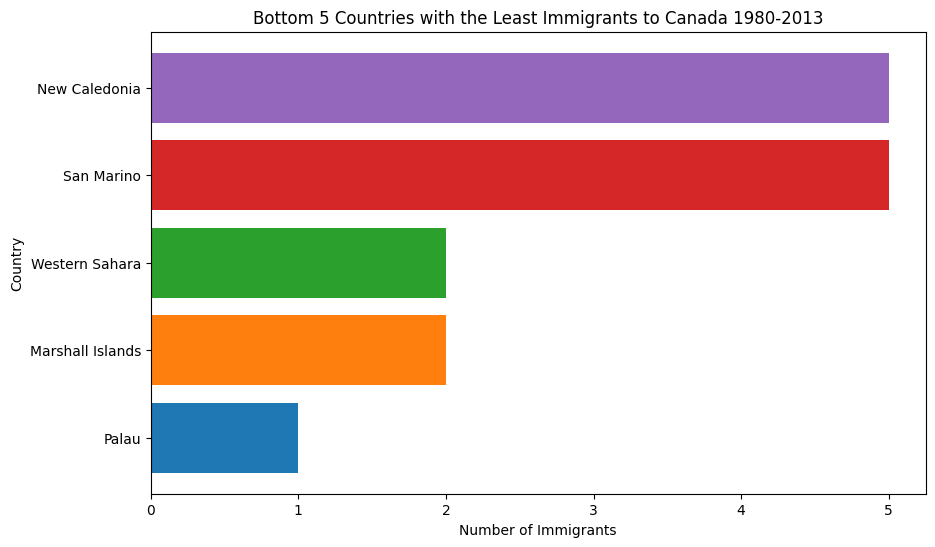

In [52]:
import matplotlib.pyplot as plt

# Get the bottom 5 countries with the least immigrants
bottom_countries = df.groupby('Country')['Total'].sum().sort_values(ascending=True)[:5]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(bottom_countries.index, bottom_countries.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Set chart title and labels
ax.set_title('Bottom 5 Countries with the Least Immigrants to Canada 1980-2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Country')

# Show the plot
plt.show()




The bar chart that shows the bottom 5 countries with the least immigrants to Canada from 1980 to 2013. The number of immigrants for these countries is very small compared to the other countries in the dataset. The chart gives us a visual representation of the difference in the number of immigrants between these countries and the top 10 countries with the most immigrants to Canada.






<ipython-input-53-1a7d5bcbb878>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_btm5 = df_btm5.groupby("Country", axis=0).sum()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New Caledonia'),
  Text(1, 0, 'San Marino'),
  Text(2, 0, 'Marshall Islands'),
  Text(3, 0, 'Western Sahara'),
  Text(4, 0, 'Palau')])

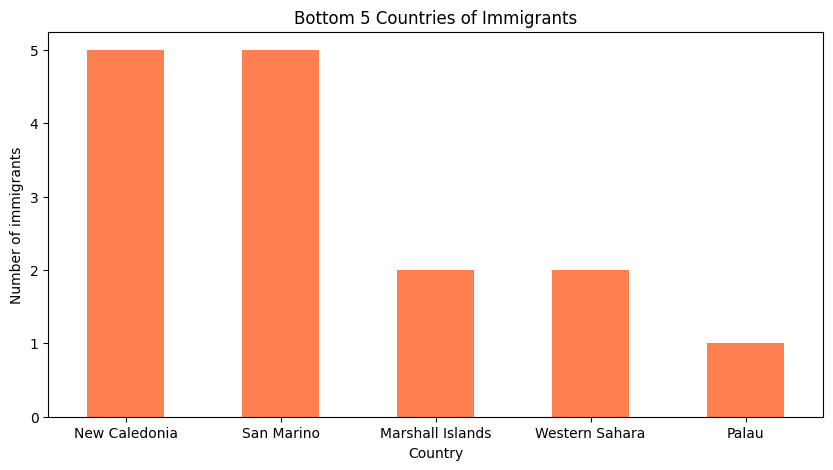

In [53]:
df_btm5 = df.nsmallest(n=5, columns='Total')
df_btm5 = df_btm5.groupby("Country", axis=0).sum()
df_btm5.head()
df_btm5['Total'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=90, color='Coral')
plt.title('Bottom 5 Countries of Immigrants')
plt.ylabel('Number of immigrants')
plt.xticks(rotation=0)

### **Since we now know the botton five countries. Let's take a look at the number of new immigrants to Canada in 2013.**

Distribution of the number of new immigrants to Canada in 2013, from 195 different countries.



In [54]:
df['2013'].head()

0    2004
1     603
2    4331
3       0
4       1
Name: 2013, dtype: int64

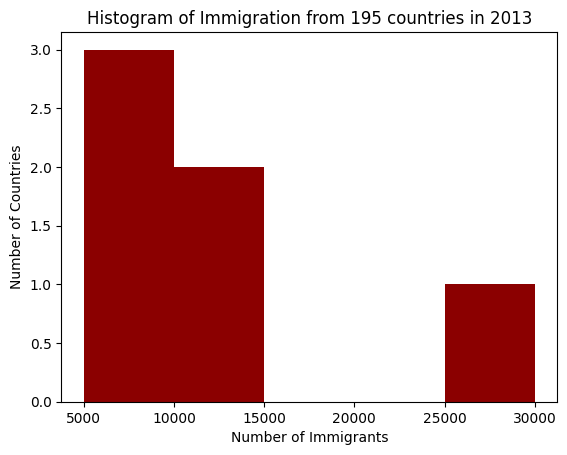

In [55]:
# Set the bin size
bin_size = 5000

# Calculate the range of values to display
max_value = int(df['2013'].max())
min_value = int(df['2013'].min())
range_values = (min_value//bin_size + 1)*bin_size, (max_value//bin_size + 1)*bin_size

# Plot the histogram with adjusted settings
plt.hist(df['2013'], bins=range(*range_values, bin_size), color='darkred')

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.xticks(range(*range_values, bin_size))

plt.show()


The histogram shows the distribution of the number of new immigrants to Canada in 2013, from 195 different countries. The histogram is right-skewed, with most countries having a relatively small number of new immigrants in 2013, while a few countries had much larger numbers of immigrants. This allows us to see the distribution of the data more clearly, as it uses a specific bin size that allows for a better resolution of the data.

## **Visualize the distribution of the top 10 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.**

In [34]:
df_top10 = df.sort_values(['Total'], ascending=False, axis=0).head(10)
df_top10

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
185,United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
81,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
162,Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
140,Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
137,Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,...,1405,1263,1235,1267,1013,795,720,779,852,139241


In [35]:
# Define the lists of years
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# Select the columns for each decade and sum the values
df_80s = df_top10.loc[:, years_80s].sum(axis=1)
df_90s = df_top10.loc[:, years_90s].sum(axis=1)
df_00s = df_top10.loc[:, years_00s].sum(axis=1)

# Create a new DataFrame with the summed values for each decade
df_decade = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

df_decade.head(5)


,1980s,1990s,2000s
79,82154,180395,303591
36,32003,161528,340385
183,179171,261966,83413
136,60764,138482,172904
130,10591,65302,127598


In [36]:
df_decade.describe()

,1980s,1990s,2000s
count,10.000000,10.0000,10.000000
mean,55164.100000,109293.3000,130034.800000
std,51005.259272,73125.6123,110230.126938
min,10591.000000,38189.0000,13629.000000
25%,17563.500000,58902.2500,66391.250000
50%,44802.500000,67861.5000,79293.000000
75%,72809.000000,155766.5000,161577.500000
max,179171.000000,261966.0000,340385.000000


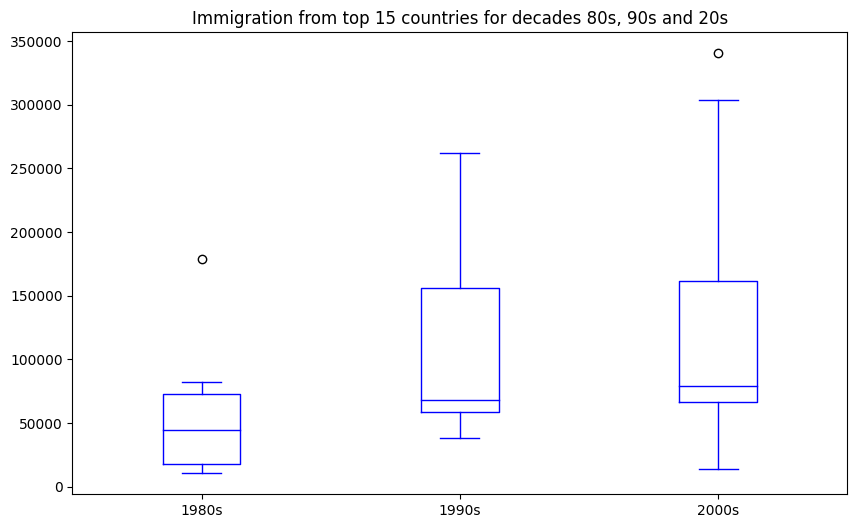

In [37]:
df_decade.plot(kind='box', figsize=(10, 6), color = 'blue')
plt.title('Immigration from top 15 countries for decades 80s, 90s and 20s')
plt.show()

The box plot represents the distribution of immigration data from the top 15 countries to Canada for the three decades (80s, 90s, 2000s). The box represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend to the most extreme data points that are not considered outliers, which are shown as individual dots. Outliers, which are data points that are significantly higher or lower than the other data points, are shown as individual points beyond the whiskers.

From the plot, we can see that the distribution of immigration data for each decade is different. The 80s and 90s have a similar median and IQR, while the 2000s have a higher median and a larger IQR, indicating a wider range of immigration numbers for the top 15 countries. The plot also shows that there are several outliers in the 2000s, indicating that some countries had a significantly higher number of immigrants during this decade compared to the others.





### **Looking at the immigration trend over the years. Lets us use a scatter plot for clear anlysis of the  upward trend in the data.**

Using Scatter plot to visualize the overall trend of immigration to Canada over the past few decades. By observing the fluctuations in the number of immigrants over time, we can gain insights into the historical events and economic factors that influenced immigration patterns during this period. 

In [56]:
df_new = pd.DataFrame(df_canada[years].sum(axis=0))

df_new.index = map(int, df_new.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_new.reset_index(inplace = True)
df_new.columns = ['year', 'total']
df_new.head(6)

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978


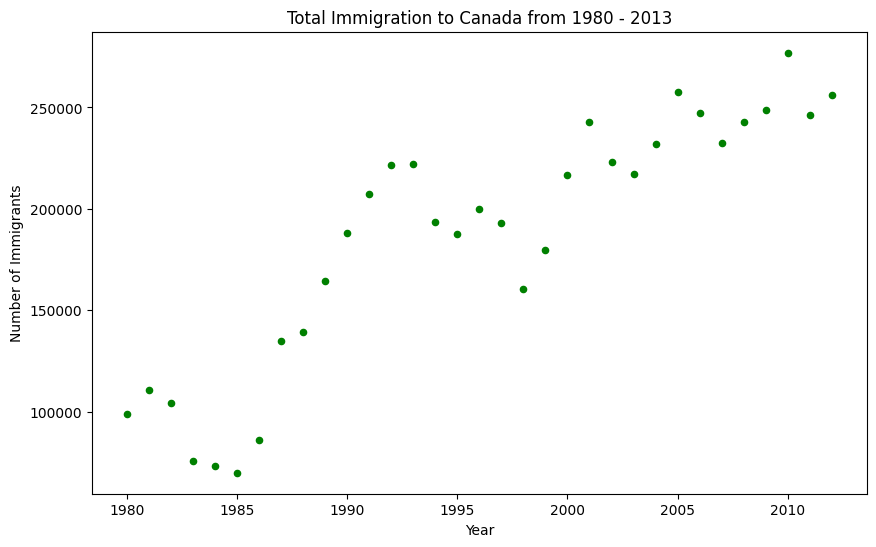

In [58]:
df_new.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='green')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()


In [59]:
#Used a first-order polynomial to the scatter plot of x and y data points to return the coefficients of the fitted line.
x = df_new['year']      
y = df_new['total']    
fit = np.polyfit(x, y, deg=1)
# print out the coefficients of the polynomial
print(fit)

[ 5.69677707e+03 -1.11843544e+07]


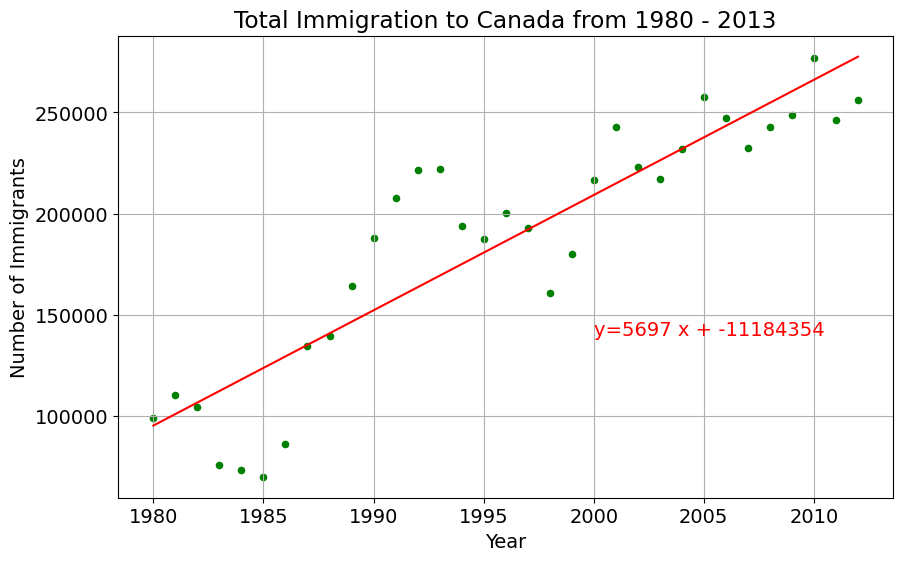

'No. Immigrants = 5697 * Year + -11184354'

In [61]:
plt.rcParams.update({'font.size': 14})

# Create scatter plot with green points
df_new.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='green')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Add gridlines
plt.grid(True)

# Plot red regression line
plt.plot(x, fit[0] * x + fit[1], color='red')

# Add annotation for line of best fit
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 140000), color='red')

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])


The result "No. Immigrants = 5697 * Year + -11184354" shows the equation of the line of best fit that has been plotted on the scatter plot. According to the line of best fit, the number of immigrants to Canada is increasing by an average of 5697 people per year. The negative y-intercept implies that in the year 0 which is not a valid year in this context, the model predicts that there were -11,184,354 immigrants to Canada, which doesn't seem right. Therefore, the model should only be used for years after 1980.


In conclusion, the  scatter plot and line of best fit demonstrate the trends in total immigration to Canada from 1980 to 2013 and shows the overall upward trend in immigration, with some slight fluctuations in certain years. 

Based on the regression analysis, we can predict that the number of immigrants to Canada will continue to increase in the coming years. However, it is important to note that this prediction is based solely on historical data and may not accurately reflect future immigration patterns. Additionally, there may be other factors that could affect immigration to Canada in the future, such as changes in government policy or global events.